## Importando as bibliotecas utilizadas

In [1]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy.spatial import distance as dist

##Lembrar de verificar quais libs nao estao sendo utilizada

## Transformando a imagem de exemplo em preto e branco

([array([[[ 96,  68]],

       [[ 96,  73]],

       [[ 98,  73]],

       [[ 99,  74]],

       [[100,  74]],

       [[101,  73]],

       [[101,  69]],

       [[100,  68]]], dtype=int32), array([[[115,  39]],

       [[114,  40]],

       [[113,  40]],

       [[112,  41]],

       [[111,  41]],

       [[111,  44]],

       [[112,  45]],

       [[114,  45]],

       [[115,  46]],

       [[135,  46]],

       [[136,  47]],

       [[133,  50]],

       [[133,  66]],

       [[135,  68]],

       [[134,  69]],

       [[133,  69]],

       [[130,  66]],

       [[114,  66]],

       [[112,  68]],

       [[111,  68]],

       [[110,  69]],

       [[110,  73]],

       [[134,  73]],

       [[134,  70]],

       [[135,  69]],

       [[136,  69]],

       [[137,  70]],

       [[138,  70]],

       [[138,  69]],

       [[139,  68]],

       [[139,  59]],

       [[140,  58]],

       [[140,  46]],

       [[139,  45]],

       [[139,  46]],

       [[138,  47]],

       [[137,  4

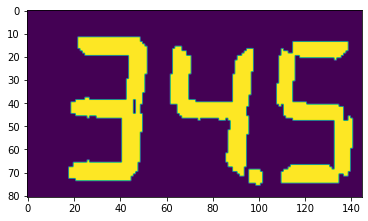

In [75]:
imagem_exemplo = "ex.png"
image = cv2.imread(imagem_exemplo)

#Transformando a imagem em escala de cinza
gray_scale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#Revelando regioes mais escuras (ou seja, os digitos) do que a regiao claras (o fundo)
thresh = cv2.threshold(gray_scale_image, 1, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

#Limpando a imagem com operações morfologicas (Abertura e fechamento)

#Foram testados diferentes valores para o kernel (2....9), sendo o 4 o melhor resultado
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (1,4))

#Limpando a imagem com operações morfologicas (Abertura e fechamento)
thresh = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

#Aplicando filtragem de contorno
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print(cnts)


plt.imshow(closing)

## Definindo o dicionário com as posições "ligadas" dos digitos

In [ ]:
DIGITS_LOOKUP = {
    (1, 1, 1, 0, 1, 1, 1): 0,
    (0, 0, 1, 0, 0, 1, 0): 1,
    (1, 0, 1, 1, 1, 1, 0): 2,
    (1, 0, 1, 1, 0, 1, 1): 3,
    (0, 1, 1, 1, 0, 1, 0): 4,
    (1, 1, 0, 1, 0, 1, 1): 5,
    (1, 1, 0, 1, 1, 1, 1): 6,
    (1, 0, 1, 0, 0, 1, 0): 7,
    (1, 1, 1, 1, 1, 1, 1): 8,
    (1, 1, 1, 1, 0, 1, 1): 9
}